* Categorical Trending
* Channel- Trending
* categories-views of trending videos 
* Views-Likes (pie)
* trending-removed (pie)
* 

In [36]:
# Data processing 
import pandas as pd
from collections import Counter
from itertools import chain
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

# Data vizualizations
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlp

In [4]:
data  = pd.read_csv('INvideos.csv')

In [10]:
data.head(n=10
         )

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...
5,il_pSa5l98w,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...
6,7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...
7,c64I9HNpiOY,17.14.11,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11T06:14:19.000Z,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,https://i.ytimg.com/vi/c64I9HNpiOY/default.jpg,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...
8,KObFEYCaRx8,17.14.11,Chiranjeevi in Naga Chaitanya - Samantha Recep...,Top Telugu Media,24,2017-11-13T04:42:26.000Z,Chiranjeevi in Naga Chaitanya - Samantha Recep...,118223,520,53,23,https://i.ytimg.com/vi/KObFEYCaRx8/default.jpg,False,False,False,Chiranjeevi in Naga Chaitanya - Samantha Recep...
9,g8QsfJhFpjY,17.14.11,New bike vs Old bike - the reality,Jump Cuts,24,2017-11-12T04:30:01.000Z,"Jump cuts|""Jumpcuts""|""Tamil comedy""|""Tamil Com...",969030,59798,1545,2404,https://i.ytimg.com/vi/g8QsfJhFpjY/default.jpg,False,False,False,Jump Cuts is a Tamil entertaining group by Har...


In [6]:
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [8]:
data.shape

(37352, 16)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
video_id                  37352 non-null object
trending_date             37352 non-null object
title                     37352 non-null object
channel_title             37352 non-null object
category_id               37352 non-null int64
publish_time              37352 non-null object
tags                      37352 non-null object
views                     37352 non-null int64
likes                     37352 non-null int64
dislikes                  37352 non-null int64
comment_count             37352 non-null int64
thumbnail_link            37352 non-null object
comments_disabled         37352 non-null bool
ratings_disabled          37352 non-null bool
video_error_or_removed    37352 non-null bool
description               36791 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 3.8+ MB


So there are about 561 missing values in the description field , we can get rid of them .

In [25]:
data = data.dropna()

### Trending videos : analysis by categories 

In [26]:
np.unique(data['category_id'])

array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 43])

Now we will change the category id to a category name for a better understanding . 
I have used the following list :
* 1 - Film & Animation 
* 2 - Autos & Vehicles
* 10 - Music
* 15 - Pets & Animals
* 17 - Sports
* 18 - Short Movies
* 19 - Travel & Events
* 20 - Gaming
* 21 - Videoblogging
* 22 - People & Blogs
* 23 - Comedy
* 24 - Entertainment
* 25 - News & Politics
* 26 - Howto & Style
* 27 - Education
* 28 - Science & Technology
* 29 - Nonprofits & Activism
* 30 - Movies
* 31 - Anime/Animation
* 32 - Action/Adventure
* 33 - Classics
* 34 - Comedy
* 35 - Documentary
* 36 - Drama
* 37 - Family
* 38 - Foreign
* 39 - Horror
* 40 - Sci-Fi/Fantasy
* 41 - Thriller
* 42 - Shorts
* 43 - Shows
* 44 - Trailers

Using YouTube API v3 video category id list by Dinesh Gowtham Prathap at https://gist.github.com/dgp/1b24bf2961521bd75d6c



In [31]:
z = {1 : 'Film & Animation', 
     2 : 'Autos & Vehicles',
10 : 'Music',
15 : 'Pets & Animals' ,
17 : 'Sports',
18 : 'Short Movies',
19 : 'Travel & Events',
20 : 'Gaming',
21 : 'Videoblogging',
22 : 'People & Blogs',
23 : 'Comedy',
24 : 'Entertainment',
25 : 'News & Politics',
26 : 'Howto & Style',
27 : 'Education',
28 : 'Science & Technology',
29 : 'Nonprofits & Activism',
30 : 'Movies',
31 : 'Anime/Animation',
32 : 'Action/Adventure',
33 : 'Classics',
34 : 'Comedy',
35 : 'Documentary',
36 : 'Drama',
37 : 'Family',
38 : 'Foreign',
39 : 'Horror',
40 : 'Sci-Fi/Fantasy',
41 : 'Thriller',
42 : 'Shorts',
43 : 'Shows',
44 : 'Trailers'
}

In [34]:
data['category_id'] = data['category_id'].map(z)

/home/akarsh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [35]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,Film & Animation,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,News & Politics,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,Entertainment,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,Comedy,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,Entertainment,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [37]:
data_cat = data['category_id'].value_counts().reset_index()

Text(0.5,1,'Categories of trending videos')

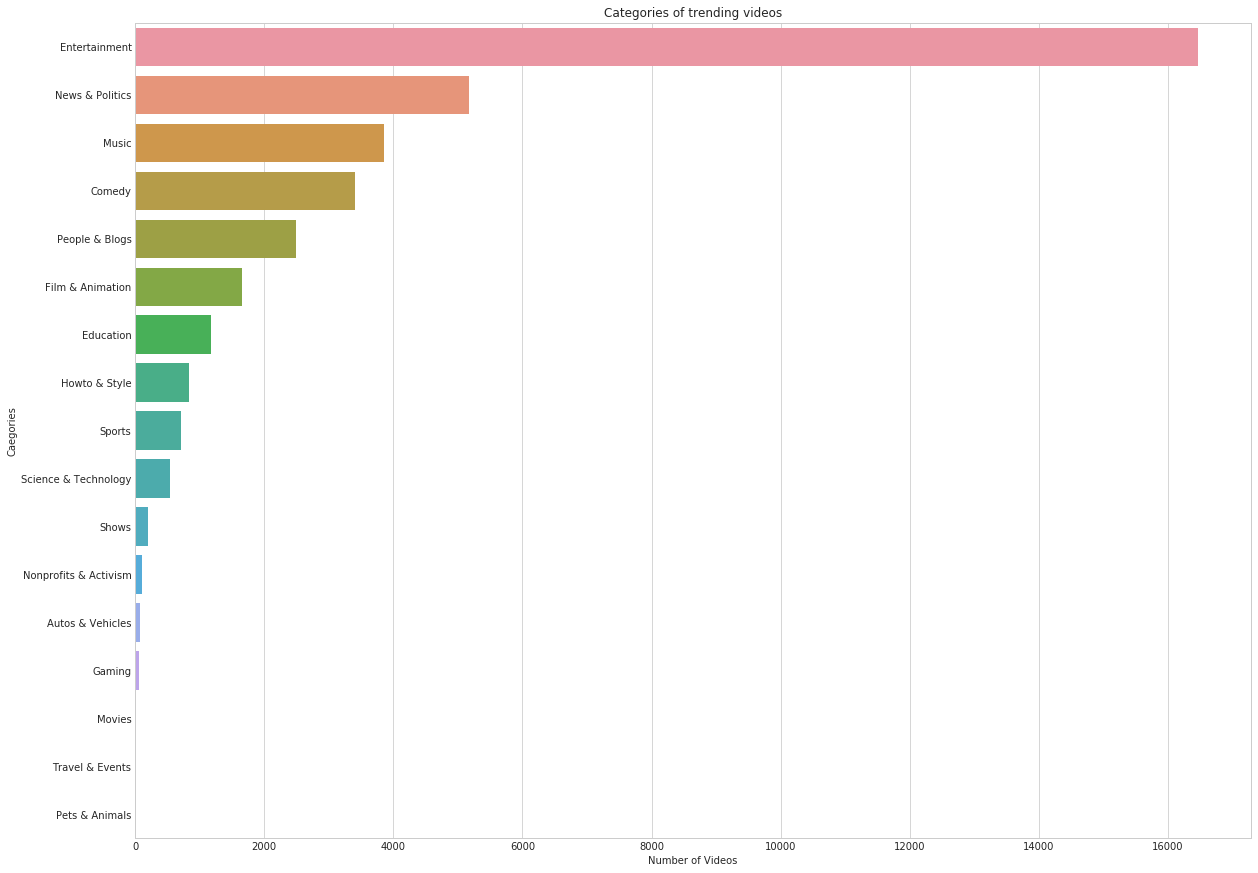

In [46]:
plt.figure(figsize=(20,15))
sns.set_style('whitegrid')
barp = sns.barplot(x=data_cat['category_id'], y= data_cat['index'], orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Caegories")
plt.title("Categories of trending videos")


Not a surprising result , most of the trending videos belong to *Entertainment* category , followed by *News & Politics* and *Music* . 

In [47]:
#Trending Videos : analysis channel wise


In [48]:
data_chann = data['channel_title'].value_counts().reset_index()

In [57]:
data_chann.iloc[0:50][:]

,index,channel_title
0,VikatanTV,284
1,etvteluguindia,282
2,Flowers Comedy,270
3,ETV Plus India,251
4,SAB TV,244
5,RadaanMedia,243
6,SET India,238
7,mallemalatv,238
8,ETV Jabardasth,234
9,Vijay Television,231


In [59]:
data[data['video_error_or_removed']==True]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
27488,q8v9MvManKE,18.22.04,Earth Day 2018 Google Doodle,googledoodles,Film & Animation,2018-04-21T15:00:50.000Z,[none],2919347,344509,6816,29131,https://i.ytimg.com/vi/q8v9MvManKE/default.jpg,False,False,True,Today’s annual Earth Day Doodle was created in...
27626,q8v9MvManKE,18.22.04,Earth Day 2018 Google Doodle,googledoodles,Film & Animation,2018-04-21T15:00:50.000Z,[none],2919347,344513,6816,29131,https://i.ytimg.com/vi/q8v9MvManKE/default.jpg,False,False,True,Today’s annual Earth Day Doodle was created in...
27677,q8v9MvManKE,18.23.04,Earth Day 2018 Google Doodle,googledoodles,Film & Animation,2018-04-21T15:00:50.000Z,[none],4733057,445944,10306,35394,https://i.ytimg.com/vi/q8v9MvManKE/default.jpg,False,False,True,Today’s annual Earth Day Doodle was created in...
27823,q8v9MvManKE,18.23.04,Earth Day 2018 Google Doodle,googledoodles,Film & Animation,2018-04-21T15:00:50.000Z,[none],4733057,445947,10306,35394,https://i.ytimg.com/vi/q8v9MvManKE/default.jpg,False,False,True,Today’s annual Earth Day Doodle was created in...
27876,q8v9MvManKE,18.24.04,Earth Day 2018 Google Doodle,googledoodles,Film & Animation,2018-04-21T15:00:50.000Z,[none],1682462,175181,4182,14250,https://i.ytimg.com/vi/q8v9MvManKE/default.jpg,False,False,True,Today’s annual Earth Day Doodle was created in...
28014,q8v9MvManKE,18.24.04,Earth Day 2018 Google Doodle,googledoodles,Film & Animation,2018-04-21T15:00:50.000Z,[none],1682462,175183,4182,14250,https://i.ytimg.com/vi/q8v9MvManKE/default.jpg,False,False,True,Today’s annual Earth Day Doodle was created in...
28075,q8v9MvManKE,18.25.04,Earth Day 2018 Google Doodle,googledoodles,Film & Animation,2018-04-21T15:00:50.000Z,[none],880003,14642,453,2875,https://i.ytimg.com/vi/q8v9MvManKE/default.jpg,False,False,True,Today’s annual Earth Day Doodle was created in...
28220,q8v9MvManKE,18.25.04,Earth Day 2018 Google Doodle,googledoodles,Film & Animation,2018-04-21T15:00:50.000Z,[none],880003,14642,453,2875,https://i.ytimg.com/vi/q8v9MvManKE/default.jpg,False,False,True,Today’s annual Earth Day Doodle was created in...
28295,q8v9MvManKE,18.26.04,Earth Day 2018 Google Doodle,googledoodles,Film & Animation,2018-04-21T15:00:50.000Z,[none],521421,34559,1915,5723,https://i.ytimg.com/vi/q8v9MvManKE/default.jpg,False,False,True,Today’s annual Earth Day Doodle was created in...
28422,q8v9MvManKE,18.26.04,Earth Day 2018 Google Doodle,googledoodles,Film & Animation,2018-04-21T15:00:50.000Z,[none],521421,34559,1915,5723,https://i.ytimg.com/vi/q8v9MvManKE/default.jpg,False,False,True,Today’s annual Earth Day Doodle was created in...
